In [1]:
import numpy as np

Una medida generaliza es un conjunto de operadores $M_j$ que satisfacen $\sum_j M_j^\dagger M_j = I$. A los operadores $E_j=M_j^\dagger M_j $ son llamados elementos de POVM.

In [2]:
def random_generalized_measurement():
    
    Z0 = np.random.randn(2,2) + 1j*np.random.randn(2,2)
    Z0, _ = np.linalg.qr(Z0)
    
    Z1 = np.random.randn(2,2) + 1j*np.random.randn(2,2)
    Z1, _ = np.linalg.qr(Z1)
    
    M0 = Z0@np.array([ [1,0], [0,0] ])
    M1 = Z1@np.array([ [0,0], [0,1] ])
    
    return M0, M1

In [3]:
def random_quantum_state():
    z0 = np.random.randn(2) + 1j*np.random.randn(2)
    z0 = z0/np.linalg.norm(z0)
    return z0

In [4]:
M0, M1 = random_generalized_measurement()

In [5]:
M0.T.conj()@M0 + M1.T.conj()@M1

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [6]:
V0, D0, U0 = np.linalg.svd(M0) 
V1, D1, U1 = np.linalg.svd(M1) 

In [7]:
U0, U1

(array([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]),
 array([[ 0.        +0.j       , -0.22840074-0.9735672j],
        [-1.        +0.j       , -0.        +0.j       ]]))

In [8]:
V0, V1

(array([[-0.25880612-0.33733364j,  0.18887638+0.88518423j],
        [ 0.60620128-0.6721201j ,  0.39280855-0.16271457j]]),
 array([[-0.628248  +0.j        , -0.77801314+0.j        ],
        [-0.55373881-0.54651421j,  0.44714579+0.4413119j ]]))

In [9]:
D0, D1

(array([1., 0.]), array([1., 0.]))

In [10]:
np.linalg.svd(M0) 

(array([[-0.25880612-0.33733364j,  0.18887638+0.88518423j],
        [ 0.60620128-0.6721201j ,  0.39280855-0.16271457j]]),
 array([1., 0.]),
 array([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]))

In [11]:
from qiskit import QuantumCircuit, Aer
from qiskit.compiler import transpile
from PovmN import *

In [69]:
ψ = random_quantum_state()
ϕ = random_quantum_state()

In [78]:
ψ, ϕ

(array([0.71357796+0.13077629j, 0.56930941+0.38676976j]),
 array([-0.44906725-0.66246669j,  0.58596998-0.12694756j]))

In [70]:
N=2
th1=[pi]
th2=[pi/2]
th_v1=[pi]
th_v2=[pi/2]
fi_v1=[pi]
fi_v2=[pi/2]
lam_v1=[pi]
lam_v2=[pi/2]

In [71]:
circuit = povmN(U,N,th1,th2,th_v1,th_v2,fi_v1,fi_v2,lam_v1,lam_v2)

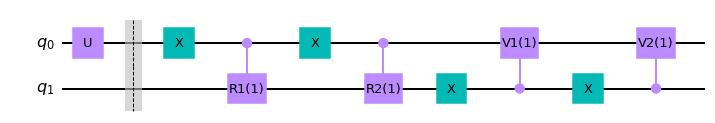

In [72]:
circuit.draw(output='mpl')

In [73]:
qc_ψ = QuantumCircuit( 2, 1 )
qc_ψ.initialize( ψ, 0 )
qc_ψ.barrier()
qc_ψ.compose( circuit, [0,1], inplace=True )
qc_ψ.measure( 1, 0 )

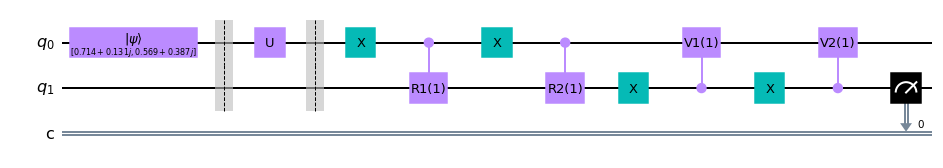

In [74]:
qc_ψ.draw(output='mpl')

In [75]:
qc_ϕ = QuantumCircuit( 2, 1 )
qc_ϕ.initialize( ϕ, 0 )
qc_ϕ.barrier()
qc_ϕ.compose( circuit, [0,1], inplace=True )
qc_ϕ.measure( 1, 0 )

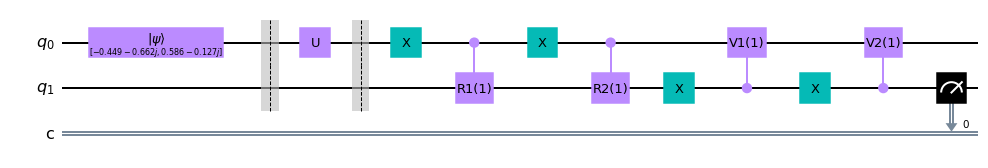

In [79]:
qc_ϕ.draw(output='mpl')

In [80]:
backend_sim = Aer.get_backend('aer_simulator')

In [81]:
qc_ψ = transpile(qc_ψ, backend_sim)
results_ψ = backend_sim.run( qc_ψ )

In [82]:
qc_ϕ = transpile(qc_ψ, backend_sim)
results_ϕ = backend_sim.run( qc_ϕ )

In [83]:
shots = 2**10

In [84]:
counts_ψ = results_ψ.result().get_counts()
counts_ψ

{'1': 776, '0': 248}

In [85]:
counts_ϕ =results_ϕ.result().get_counts()
counts_ϕ

{'0': 209, '1': 815}

$\psi\rightarrow 0$

$\varphi\rightarrow 1$

inconclusivo $\rightarrow 2$

In [86]:
p_0_ψ = counts_ψ['0'] / shots
p_1_ψ = counts_ψ['1'] / shots
p_0_ϕ = counts_ϕ['0'] / shots
p_1_ϕ = counts_ϕ['1'] / shots

In [87]:
p_0_ψ

0.2421875

In [88]:
p_1_ψ 

0.7578125

In [89]:
p_0_ϕ  

0.2041015625

In [90]:
p_1_ϕ

0.7958984375

In [91]:
Perr = 0.5*p_1_ψ + 0.5*p_0_ϕ
Perr

0.48095703125

In [ ]:

- PovmN
- QNN
--- discriminate( ψ, ϕ, shots, iters, α_error, α_inc, noise )
--- cost_function( ψ, ϕ, parameters )
- utils

- examples 
- experimento






